# Load Data
You can decide below whether to use the data already provided or your own data.
The data provided here contains the information of 10000 randomly sampled weights to keep file size managable.

To use your own data, run `compare_measures_scatter_plots.py` and change the line below
`meta = 'run_old_subsampled'`
to 
`meta = 'run_new'`

In [ ]:
import pickle
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from utils import intensity_plot
%matplotlib inline
name = 'all_measures_'
meta = 'run_old_subsampled'
  
with open(name+meta+'.pickle', 'rb') as f:
    D = pickle.load(f)
    
apply_max_op_to_SI = True
if apply_max_op_to_SI:
    x = np.asarray(D['SI'])
    x.shape
    x = np.maximum(0,x)
    D['SI'] = x

# Scatter Plot

Pearson correlation between SI and OnAF is: (0.9977475711224317, 0.0)


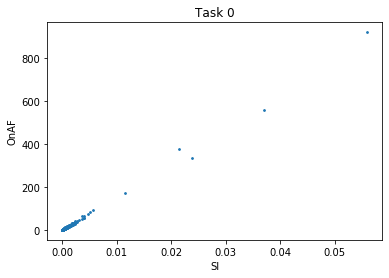

In [6]:
# choose what should be plotted on x-axis and y-axis
# you can choose SI, SIB, SIU, OnAF, AF, EWC, MAS, MASX 
task = 0
x = 'SI'
y = 'OnAF'
#chose a random sample of weights to make plotting faster. If False, all weights are plotted
subsample_weights = True 
#chose number of randomly sampled weights (only works if subsample_weights = True)
n_subsample = int(1e4) 


# plot it
x_data = np.asarray(D[x][task])
y_data = np.asarray(D[y][task])
#correlation for whole, not subsampled, data
print('Pearson correlation between',x,'and',y, 'is:', scipy.stats.pearsonr(x_data, y_data))

if subsample_weights:
    permuted = np.random.permutation(len(x_data))
    displayed = permuted[:n_subsample]
    x_data = x_data[displayed]
    y_data = y_data[displayed]

fig, ax = plt.subplots()
ax.scatter(x_data,y_data,s=3)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title('Task '+ str(task))
marg = 0.05
ax.set_xlim([min(x_data)-marg*(max(x_data)-min(x_data)), max(x_data)+marg*(max(x_data)-min(x_data))])
ax.set_ylim([min(y_data)-marg*(max(y_data)-min(y_data)), max(y_data)+marg*(max(y_data)-min(y_data))])
fig.show()

# Intensity Plot

Pearson correlation between SI and OnAF is: (0.6047493999777461, 0.0)
columns normalised


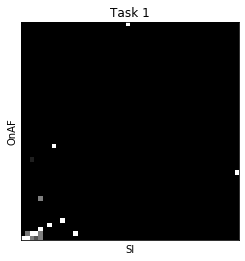

In [3]:
#same options as for scatter plot.
task = 1
x = 'SI'
y = 'OnAF'
subsample_weights = True 
n_subsample = int(1e5) 

x_data = np.asarray(D[x][task])
y_data = np.asarray(D[y][task])
print('Pearson correlation between',x,'and',y, 'is:', scipy.stats.pearsonr(x_data, y_data))

if subsample_weights:
    permuted = np.random.permutation(len(x_data))
    displayed = permuted[:n_subsample]
    x_data = x_data[displayed]
    y_data = y_data[displayed]

n_bins = 50
intensity_plot(x_data,y_data,n_bins,xlabel=x,ylabel=y,title='Task '+str(task))

In [7]:
import pickle
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from utils import intensity_plot
%matplotlib inline
name = 'all_measures_'
meta = 'run_old'
  
with open(name+meta+'.pickle', 'rb') as f:
    D = pickle.load(f)
    
apply_max_op_to_SI = True
if apply_max_op_to_SI:
    x = np.asarray(D['SI'])
    x.shape
    x = np.maximum(0,x)
    D['SI'] = x
    
    

In [19]:
C = {}
aa = D['AF'][0].shape[0]
print(aa)
disp = np.random.permutation( aa )
disp = disp[:10000]
for x in D.keys():
    C[x] = []
    dat = D[x]
    for i in range(len(D['AF'])):
        C[x].append(dat[i][disp])
with open('all_measures_run_old_subsampled.pickle', 'wb') as file:
    pickle.dump(C, file)            

      

2163232


Pearson correlation between SI and OnAF is: (0.9972518953323886, 0.0)


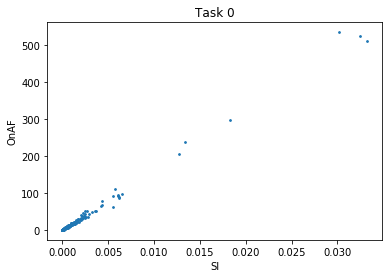

In [17]:
# choose what should be plotted on x-axis and y-axis
# you can choose SI, SIB, SIU, OnAF, AF, EWC, MAS, MASX 
task = 0
x = 'SI'
y = 'OnAF'
#chose a random sample of weights to make plotting faster. If False, all weights are plotted
subsample_weights = True 
#chose number of randomly sampled weights (only works if subsample_weights = True)
n_subsample = int(1e4) 


# plot it
x_data = np.asarray(C[x][task])
y_data = np.asarray(C[y][task])
#correlation for whole, not subsampled, data
print('Pearson correlation between',x,'and',y, 'is:', scipy.stats.pearsonr(x_data, y_data))

if subsample_weights:
    permuted = np.random.permutation(len(x_data))
    displayed = permuted[:n_subsample]
    x_data = x_data[displayed]
    y_data = y_data[displayed]

fig, ax = plt.subplots()
ax.scatter(x_data,y_data,s=3)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title('Task '+ str(task))
marg = 0.05
ax.set_xlim([min(x_data)-marg*(max(x_data)-min(x_data)), max(x_data)+marg*(max(x_data)-min(x_data))])
ax.set_ylim([min(y_data)-marg*(max(y_data)-min(y_data)), max(y_data)+marg*(max(y_data)-min(y_data))])
fig.show()